# EJERCICIO M√ìDULO 3:

Uso de Pandas y Seaborn + alg√∫n gr√°fico de Plotly.

Dataset: diamonds.

IMPORTANTE: cargar el dataset desde CSV desde la carpeta Data porque tendr√° nulos introducidos manualmente.

* PARTE 1: 25 % carga y limpieza
    * Carga con Pandas: pd.read_csv

    * Limpieza de valores error: 
        * hay columnas que tienen un valor '?', por tanto se deben reemplazar por un valor nan.

    * Cambio de tipo de dato: .astype() a num√©ricos y textos, por ejemplo a categorical y carat a float32 o float16

    * Limpieza de nulos (limpiar valores NaN):
        * Nulos en columnas continuas: mediana, media
        * Nulos en columnas categ√≥ricas: moda, un valor fijo

    * Encoding: texto a num√©rico
        * Uso de la funci√≥n get_dummies() para encoding one_hot
        * Uso de map para encoding ordinal para la columna cut como una nueva columna cut_int: 1, 2, 3, 4

* PARTE 2: 25 % transformaciones:
    * Crear una columna price_iva a partir de la columna price que muestre el precio + IVA (21%). 
        * Ejemplo df['price'] * 1.21 

    * Crear una columna price_discount usando apply a partir de la columna price(con lambda o def):
        * price < 1000 and cut == 'Ideal' entonces 10 % descuento
        * 1000 <= price <= 5000 and cut == 'Premium' entonces 15 % descuento
        * si no entra en las condiciones sin descuento, devolver el precio original

    * Crear una nueva columna volumen combinando: x * y * z

    * Ordenar por dos columnas con sort_values():
        * tipo de corte (cut) y precio (price)

    * Agrupaciones con groupby y visualizarla
        * Agrupar por las 3 que hay de tipo categ√≥rico calculando la media, max, min por ejemplo de alguna de las num√©ricas: price, carat, depth

* PARTE 3: 20 % distribuciones: 

* Outliers: Visualizaci√≥n Q1 y Q3 y calcular l√≠mites tukey y filtrar. Sobre la columna precio.

* asimetr√≠a, curtosis y transformar datos con logaritmo o ra√≠z cuadrada, aplicar sobre precio, visualizar el histograma y/o boxplot por tipo de corte. Opcional ajustar la escala.

* Discretizar la columna precio por barato, medio, caro usando la funci√≥n pd.cut


* PARTE 4: 30 % visualizaciones:

* Seaborn EDAS:
    * univariantes:
        * histogramas y curvas de densidad
        * boxplot
        * countplot
    * bivariantes y multivariantes
        * scatterplot con hue, con size, con style
        * Calcular correlaci√≥n con Pandas y mostrarla con seaborn
        * Hacer la correlaci√≥n en un gr√°fico de barras para la columna 'price'
        * Crear una pivot table usando como index y columns algunas variables categ√≥ricas y como values usar el price y visualizarla con heatmap de seaborn
    * Combinarlas con:
        * hue, style, size, row, col usando un relplot
        * filtro


# EJERCICIO M√ìDULO 3:

Uso de Pandas y Seaborn + alg√∫n gr√°fico de Plotly.

Dataset: diamonds.

IMPORTANTE: cargar el dataset desde CSV desde la carpeta Data porque tendr√° nulos introducidos manualmente.

# Columnas Num√©ricas del Dataset

## **carat:
Representa el peso del diamante en quilates.
Unidades: Quilates (1 quilate = 0.2 gramos).
Impacto: El peso tiene un impacto significativo en el precio del diamante. Diamantes m√°s grandes (mayor quilate) son m√°s valiosos, pero el precio no crece linealmente.

## **depth:
Descripci√≥n: Proporci√≥n de profundidad del diamante.
Se calcula como:
depth = (z / (x¬†+¬†y)/2) √ó 100

Es un porcentaje que describe cu√°n profundo es el diamante en relaci√≥n con su ancho promedio.

## **table:
Representa el ancho de la parte superior del diamante (la "tabla") como porcentaje del ancho promedio del diamante. Unidades: Porcentaje.
Impacto: Una tabla ideal se encuentra entre 53%-57% para maximizar la reflexi√≥n de la luz.

## **price:
Precio del diamante en d√≥lares estadounidenses (USD). Impacto: Determinado por una combinaci√≥n de peso (carat), calidad del corte (cut), color y claridad (clarity).

## **x, y, z:
Dimensiones f√≠sicas del diamante en mil√≠metros:
x: Longitud.
y: Ancho.
z: Profundidad.

# Columnas Categ√≥ricas
## cut:
La calidad del corte del diamante:
Categor√≠as:
-Fair (Pobre),
-Good (Bueno),
-Very Good (Muy Bueno),
-Premium (Premium),
-Ideal (Ideal).

Impacto: La calidad del corte determina qu√© tan bien el diamante refleja la luz. Ideal es el mejor corte, maximizando el brillo, mientras que Fair refleja menos luz.

## color:
El color del diamante, clasificado desde D (mejor, incoloro) hasta J (peor, amarillo tenue).
Categor√≠as:
D (Mejor, incoloro),
E, F, G, H, I, J (Peor, m√°s amarillo tenue).
Impacto: Los diamantes m√°s incoloros (D-F) son m√°s valiosos. Los colores m√°s bajos (H-J) tienen tonos amarillentos.


## clarity:
La claridad del diamante, con valores que describen la cantidad de inclusiones o defectos:
Desde IF (Internamente impecable) hasta I3 (Inclusions 3).
Categor√≠as:
IF (Internamente Impecable),
VVS1, VVS2 (Muy, muy peque√±as inclusiones),
VS1, VS2 (Muy peque√±as inclusiones),
SI1, SI2 (Peque√±as inclusiones),
I1 (Inclusions visibles).
Impacto: La claridad mide las imperfecciones internas y externas. Los grados m√°s altos (IF) son m√°s valiosos.


## Precio por Quilate:

Puedes calcular el precio por quilate como:
python
Copiar c√≥digo
df['price_per_carat'] = df['price'] / df['carat']

## Profundidad Ideal:
La profundidad ideal para un diamante ronda el 60%-62%.


# Relaciones Clave
## Relaci√≥n entre Peso y Precio:

El precio aumenta exponencialmente con el peso (carat), especialmente para pesos superiores a 1 quilate.

## Influencia del Corte, Color y Claridad:

Un corte de alta calidad puede aumentar significativamente el brillo, lo que lo hace m√°s atractivo incluso con colores m√°s bajos (H, I).
Un diamante con buen color (D-F) y claridad (IF, VVS) tiene mayor valor.

## Dimensiones (x, y, z) y Proporciones:

Las proporciones ideales de un diamante maximizan su apariencia visual y reflejan m√°s luz.

# An√°lisis Clave que Puedes Realizar
## Distribuci√≥n de Precios:

Identificar los rangos m√°s comunes de precios y analizar los factores que los afectan.

## Comparar Claridad y Color:

¬øC√≥mo se distribuyen los precios para diferentes combinaciones de claridad y color?

## Volumen del Diamante:

Crear una nueva columna para el volumen (x * y * z) y analizar su relaci√≥n con el precio.

## Correlaciones:

Calcular las correlaciones entre variables num√©ricas, como carat, price, y depth.

## An√°lisis de Valores At√≠picos:

Identificar diamantes cuyo precio o dimensiones se desv√≠an significativamente.

## PARTE 1: 
25 % carga y limpieza


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# todos los necesarios para el ejercicio mientras usemos np y sns
import matplotlib.pyplot as plt
from scipy import stats
import pickle as pkl

### 1.1. Carga con Pandas: pd.read_csv


In [2]:
df = pd.read_csv('../Data/diamonds.csv')

In [3]:
print("Primeras 10 filas del dataset:")
df.head(10)

Primeras 10 filas del dataset:


carat        cut color clarity  depth  table price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0   326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0   326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0   327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0   334   4.2  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0   335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0   336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0   336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0   337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0   337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0   338     4  4.05  2.39

In [4]:
print("Informaci√≥n inicial del dataset:")
df.info()

Informaci√≥n inicial del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53937 non-null  object 
 2   color    53938 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53938 non-null  float64
 6   price    53938 non-null  object 
 7   x        53938 non-null  object 
 8   y        53939 non-null  float64
 9   z        53939 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


In [5]:
df.describe()

carat         depth         table             y             z
count  53939.000000  53940.000000  53938.000000  53939.000000  53939.000000
mean       0.797946     61.749405     57.457145      5.734479      3.538722
std        0.474013      1.432621      2.234521      1.142092      0.705700
min        0.200000     43.000000     43.000000      0.000000      0.000000
25%        0.400000     61.000000     56.000000      4.720000      2.910000
50%        0.700000     61.800000     57.000000      5.710000      3.530000
75%        1.040000     62.500000     59.000000      6.540000      4.040000
max        5.010000     79.000000     95.000000     58.900000     31.800000

In [6]:
df.shape # 53940 filas y 10 columnas


(53940, 10)

In [7]:
df.keys() # obtenemos los nombres de las columnas

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [8]:
df.empty # nos dice si el dataframe est√° vac√≠o

False

In [9]:
df.query # nos permite hacer consultas al dataframe

<bound method DataFrame.query of        carat        cut color clarity  depth  table price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0   326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0   326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0   327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0   334   4.2  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0   335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...   ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0  2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0  2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0  2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0  2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0  2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [10]:
df.values # nos devuelve los valores del dataframe en forma de array de filas

array([[0.23, 'Ideal', 'E', ..., '3.95', 3.98, 2.43],
       [0.21, 'Premium', 'E', ..., '3.89', 3.84, 2.31],
       [0.23, 'Good', 'E', ..., '4.05', 4.07, 2.31],
       ...,
       [0.7, 'Very Good', 'D', ..., '5.66', 5.68, 3.56],
       [0.86, 'Premium', 'H', ..., '6.15', 6.12, 3.74],
       [0.75, 'Ideal', 'D', ..., '5.83', 5.87, 3.64]],
      shape=(53940, 10), dtype=object)

### 1.2. Limpieza de valores error: 


Para trabajar m√°s correctamente con un dataframe, es necesario limpia los datos, es decir, eliminar los valores nulos, duplicados y valores at√≠picos. Para ello, se pueden utilizar los siguientes m√©todos:

In [11]:
# Comprobar si hay valores nulos en cada columna (sean '?', 'nan, o no)
print("N√∫mero de valores nulos por columna:") 
print(df.isnull().sum()) 

N√∫mero de valores nulos por columna:
carat      1
cut        3
color      2
clarity    2
depth      0
table      2
price      2
x          2
y          1
z          1
dtype: int64


#### 1.2.1. sabemos que hay columnas que tienen un valor '?', por tanto se deben reemplazar por un valor nan.


In [12]:
# Verificar si hay valores exactamente iguales a '?'
print((df == '?').any().any())


True


In [13]:
# Buscar las filas donde hay valores '?'
rows_with_question_mark = df.isin(['?']).any(axis=1) # Devuelve una Serie con True en las filas que contienen '?'

# Mostrar las filas que contienen '?'
rows_with_question_mark_df = df[rows_with_question_mark] # Filtrar las filas que contienen '?'
print("Filas con valores '?':")
print(rows_with_question_mark_df) # imprime las filas que contienen '?'

Filas con valores '?':
       carat    cut color clarity  depth  table price     x     y     z
49222   0.56  Ideal     ?    VVS2   61.6   56.0  2081     ?  5.29  3.27
49227   0.50      ?     E    VVS2   61.7   61.0  2083  5.09  5.12  3.15
49229   0.70   Good     H     VS2   63.8   60.0     ?  5.59  5.51  3.54


In [14]:
# Buscar las filas donde hay valores texto
def busca_filas_con_texto(df, texto):
    # Identificar las filas que contienen el texto
    rows_with_texto_mark = df.isin([texto]).any(axis=1) # Devuelve una Serie con True en las filas que contienen 'texto'
    rows_with_texto_mark_df = df[rows_with_texto_mark] # Filtrar las filas que contienen 'texto'
    # Obtener los √≠ndices de las filas
    indices = rows_with_texto_mark_df.index.tolist()
    
    return rows_with_texto_mark_df, indices

texto = '?' # texto a buscar
filas_con_texto, indices = busca_filas_con_texto(df, texto)

busca_filas_con_texto(df, texto)
print(f"Filas con valores {texto}: ")
print(filas_con_texto) # imprime las filas que contienen 'texto'
print('------------------------------------')
print(f"√çndices de las filas con valores '{texto}':")
print(indices)

Filas con valores ?: 
       carat    cut color clarity  depth  table price     x     y     z
49222   0.56  Ideal     ?    VVS2   61.6   56.0  2081     ?  5.29  3.27
49227   0.50      ?     E    VVS2   61.7   61.0  2083  5.09  5.12  3.15
49229   0.70   Good     H     VS2   63.8   60.0     ?  5.59  5.51  3.54
------------------------------------
√çndices de las filas con valores '?':
[49222, 49227, 49229]


In [15]:
# Reemplazar valores '?' por NaN
df = df.replace('?', np.nan) 


In [16]:
# Comprobar si hay valores nulos en cada columna
print("N√∫mero de valores nulos por columna:")
print(df.isnull().sum()) # Devuelve el n√∫mero de valores nulos por columna

N√∫mero de valores nulos por columna:
carat      1
cut        4
color      3
clarity    2
depth      0
table      2
price      3
x          3
y          1
z          1
dtype: int64


Hemos comprobado que aparecen 3 valores nulos en las columnas donde antes hab√≠a interrogaci√≥n

In [17]:
# Verificar si hay valores exactamente iguales a '?'
print((df == '?').any().any()) # Devuelve True si hay alg√∫n valor igual a '?'


False


con esto ya hemos quitado los interrogantes y los hemos sustituido por nan

### 1.3. Cambio de tipo de dato: .astype() a num√©ricos y textos, por ejemplo a categorical y carat a float32 o float16


In [18]:
df.info() # informaci√≥n del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53936 non-null  object 
 2   color    53937 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53938 non-null  float64
 6   price    53937 non-null  object 
 7   x        53937 non-null  object 
 8   y        53939 non-null  float64
 9   z        53939 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


In [19]:
# Cambiar el tipo de las columnas object (que no sean el precio) a categorical
df["cut"] = df["cut"].astype("category")
df["color"] = df["color"].astype("category")
df["clarity"] = df["clarity"].astype("category")

# Cambiar a float64 para poder usarlo para calcular el volumen
df["x"] = df["x"].astype("float64") 


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53939 non-null  float64 
 1   cut      53936 non-null  category
 2   color    53937 non-null  category
 3   clarity  53938 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53938 non-null  float64 
 6   price    53937 non-null  object  
 7   x        53937 non-null  float64 
 8   y        53939 non-null  float64 
 9   z        53939 non-null  float64 
dtypes: category(3), float64(6), object(1)
memory usage: 3.0+ MB


ya est√° cambiado el tipo de la columna cut

##### 1.3.1. cambio de tipo de dato de carat , a float16

In [20]:
df["carat"] = df["carat"].astype("float16") # Cambiar a float16 para reducir el uso de memoria
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53939 non-null  float16 
 1   cut      53936 non-null  category
 2   color    53937 non-null  category
 3   clarity  53938 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53938 non-null  float64 
 6   price    53937 non-null  object  
 7   x        53937 non-null  float64 
 8   y        53939 non-null  float64 
 9   z        53939 non-null  float64 
dtypes: category(3), float16(1), float64(5), object(1)
memory usage: 2.7+ MB


Ya hemos pasado el tipo de la columna carat de float64 a float 16 para ahorrar memoria

### 1.4. Limpieza de nulos (limpiar valores NaN):


In [21]:
# df['cut'].fillna(df['cut'].mode()[0], inplace=True)

In [22]:
# Comprobar si hay valores nulos en cada columna
print("N√∫mero de valores nulos por columna:")
print(df.isnull().sum()) # Devuelve el n√∫mero de valores nulos por columna

N√∫mero de valores nulos por columna:
carat      1
cut        4
color      3
clarity    2
depth      0
table      2
price      3
x          3
y          1
z          1
dtype: int64


Vemos que hay nulos en casi todas las columnas, salvo en depth

In [23]:
# la columna price viene como object, hay que pasarla a n√∫mero antes de quitar los nulos, porque si no tendr√≠amos que poner la moda
df["price"] = pd.to_numeric(df["price"], errors="coerce")
# Cambiar a int32 para poder hacer gr√°ficas
df["price"] = df["price"].astype("float32") 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53939 non-null  float16 
 1   cut      53936 non-null  category
 2   color    53937 non-null  category
 3   clarity  53938 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53938 non-null  float64 
 6   price    53937 non-null  float32 
 7   x        53937 non-null  float64 
 8   y        53939 non-null  float64 
 9   z        53939 non-null  float64 
dtypes: category(3), float16(1), float32(1), float64(5)
memory usage: 2.5 MB


In [24]:
'''def quita_nan(df):
    for i in df.keys():
        print(i)
        df[i].fillna(df[i].mode()[0], inplace=True)'''
        
        

'def quita_nan(df):\n    for i in df.keys():\n        print(i)\n        df[i].fillna(df[i].mode()[0], inplace=True)'

In [25]:
'''def quita_nan(df): # Funci√≥n para reemplazar los NaN por la moda de cada columna
    # Iterar sobre las columnas del DataFrame
    for i in df.keys(): # Iterar sobre las columnas del dataframe
        # Calcular la asimetr√≠a (skewness) de la columna
        skewness = stats.skew(df[i].dropna()) # Calcular la asimetr√≠a de la columna sin NaN
        print(f'Asimetr√≠a de: {i} : {skewness}') # Imprimir la asimetr√≠a de la columna i

        # Reemplazar NaN seg√∫n la asimetr√≠a
        if skewness > 1: # Si la asimetr√≠a es mayor a 1, reemplazar NaN por la mediana
            df[i].fillna(df[i].median(), inplace=True) # Reemplazar NaN por la mediana
            print(f"Rellenando nulos en {i} con la mediana {df[i].median()}") 

        else: # Si la asimetr√≠a es menor o igual a 1, reemplazar NaN por la media
            df[i].fillna(df[i].mean(), inplace=True) # Reemplazar NaN por la media
            print(f"Rellenando nulos en {i} con la media {df[i].mean()}") '''


'def quita_nan(df): # Funci√≥n para reemplazar los NaN por la moda de cada columna\n    # Iterar sobre las columnas del DataFrame\n    for i in df.keys(): # Iterar sobre las columnas del dataframe\n        # Calcular la asimetr√≠a (skewness) de la columna\n        skewness = stats.skew(df[i].dropna()) # Calcular la asimetr√≠a de la columna sin NaN\n        print(f\'Asimetr√≠a de: {i} : {skewness}\') # Imprimir la asimetr√≠a de la columna i\n\n        # Reemplazar NaN seg√∫n la asimetr√≠a\n        if skewness > 1: # Si la asimetr√≠a es mayor a 1, reemplazar NaN por la mediana\n            df[i].fillna(df[i].median(), inplace=True) # Reemplazar NaN por la mediana\n            print(f"Rellenando nulos en {i} con la mediana {df[i].median()}") \n\n        else: # Si la asimetr√≠a es menor o igual a 1, reemplazar NaN por la media\n            df[i].fillna(df[i].mean(), inplace=True) # Reemplazar NaN por la media\n            print(f"Rellenando nulos en {i} con la media {df[i].mean()}") '

In [26]:
def quita_nan(df):
    columnas_no_procesadas = []  # Lista Para registrar columnas que no se pudieron procesar
    print('------------------------------------')
    # Iterar sobre las columnas del DataFrame
    for i in df.columns:        
        print('\n************************************')
        print(f"Procesando columna: {i}")
        print('1....................................')
        # Validar si la columna contiene al menos un valor no nulo
        if df[i].dropna().empty:
            print(f"La columna {i} est√° completamente vac√≠a. No se puede calcular la asimetr√≠a.")
            print('2....................................')
            columnas_no_procesadas.append((i, "Columna completamente vac√≠a"))

        # Si la columna es num√©rica
        if df[i].dtype in [np.float64, np.float32, np.float16, np.int64, np.int32, np.int16]:
            # Validar si la columna contiene al menos un valor no nulo
 
            print(f"La columna {i} es num√©rica")

            # Calcular la asimetr√≠a (skewness) de la columna sin NaN
            skewness = stats.skew(df[i].dropna())
            print(f"Asimetr√≠a de {i}: {skewness}")
            print('4....................................')

            # Reemplazar NaN seg√∫n la asimetr√≠a
            try:
                if skewness > 1:
                    mediana = df[i].median()
                    df[i].fillna(mediana, inplace=True)
                    print(f"Rellenando nulos en {i} con la mediana: {mediana}")
                else:
                    media = df[i].mean()
                    df[i].fillna(media, inplace=True)
                    print(f"Rellenando nulos en {i} con la media: {media}")
            except Exception as e:
                print(f"Error al procesar la columna {i}: {e}")
                columnas_no_procesadas.append((i, f"Error: {e}"))

        # Si la columna no es num√©rica
        else:
            # Intentar rellenar con la moda
            print(f"La columna {i} es de texto")
            print('5....................................')

            try:
                moda = df[i].mode()[0]
                df[i].fillna(moda, inplace=True)
                print(f"Rellenando nulos en {i} con la moda: {moda}")
            except Exception as e:
                print(f"Error al procesar la columna {i}: {e}")
                columnas_no_procesadas.append((i, f"Error: {e}"))
                
        # Si la columna no es num√©rica ni de texto sino que contiene ambos                
                df[i].apply(lambda x: isinstance(x, (int, float)) or pd.isnull(x))

    print('------------------------------------')
    return columnas_no_procesadas
            
print('------------------------------------')
print("Antes de procesar:")
print(df)
df.info()

quita_nan(df)

# Verificar si quedan valores nulos
print('------------------------------------')
print("Despu√©s de procesar:")
print(df)
df.info()
print('------------------------------------')
print("N√∫mero de valores nulos por columna:")
print(df.isnull().sum())
print('------------------------------------')

# Mostrar las columnas que no pudieron procesarse
#print("Columnas no procesadas:")
#for i in columnas_no_procesadas:
#    print(f"Columna: {i}")


------------------------------------
Antes de procesar:
          carat        cut color clarity  depth  table   price     x     y  \
0      0.229980      Ideal     E     SI2   61.5   55.0   326.0  3.95  3.98   
1      0.209961    Premium     E     SI1   59.8   61.0   326.0  3.89  3.84   
2      0.229980       Good     E     VS1   56.9   65.0   327.0  4.05  4.07   
3      0.290039    Premium     I     VS2   62.4   58.0   334.0  4.20  4.23   
4      0.310059       Good     J     SI2   63.3   58.0   335.0  4.34  4.35   
...         ...        ...   ...     ...    ...    ...     ...   ...   ...   
53935  0.720215      Ideal     D     SI1   60.8   57.0  2757.0  5.75  5.76   
53936  0.720215       Good     D     SI1   63.1   55.0  2757.0  5.69  5.75   
53937  0.700195  Very Good     D     SI1   62.8   60.0  2757.0  5.66  5.68   
53938  0.859863    Premium     H     SI2   61.0   58.0  2757.0  6.15  6.12   
53939  0.750000      Ideal     D     SI2   62.2   55.0  2757.0  5.83  5.87   

       

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
C:\Users\carol\AppData\Local\Temp\ipykernel_19364\3924715242.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(mediana, inplace=True)
C:\Users\carol\AppData\Local\Temp\ipykernel_19364\3924715242.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inpl

In [ ]:
quita_nan(df)
print("N√∫mero de valores nulos por columna:")
print(df.isnull().sum())


------------------------------------

************************************
Procesando columna: carat
1....................................
La columna carat es num√©rica
Asimetr√≠a de carat: 1.1171875
4....................................
Rellenando nulos en carat con la mediana: 0.7001953125

************************************
Procesando columna: cut
1....................................
La columna cut es de texto
5....................................
Rellenando nulos en cut con la moda: Ideal

************************************
Procesando columna: color
1....................................
La columna color es de texto
5....................................
Rellenando nulos en color con la moda: G

************************************
Procesando columna: clarity
1....................................
La columna clarity es de texto
5....................................
Rellenando nulos en clarity con la moda: SI1

************************************
Procesando columna: depth
1......

C:\Users\carol\AppData\Local\Temp\ipykernel_19364\3924715242.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(mediana, inplace=True)
C:\Users\carol\AppData\Local\Temp\ipykernel_19364\3924715242.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float16 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  float32 
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float16(1), float32(1), float64(5)
memory usage: 2.5 MB


In [29]:
df.head(30)

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


carat        cut color clarity  depth  table  price     x     y     z
0   0.229980      Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43
1   0.209961    Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31
2   0.229980       Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31
3   0.290039    Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63
4   0.310059       Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75
5   0.239990  Very Good     J    VVS2   62.8   57.0  336.0  3.94  3.96  2.48
6   0.239990  Very Good     I    VVS1   62.3   57.0  336.0  3.95  3.98  2.47
7   0.260010  Very Good     H     SI1   61.9   55.0  337.0  4.07  4.11  2.53
8   0.219971       Fair     E     VS2   65.1   61.0  337.0  3.87  3.78  2.49
9   0.229980  Very Good     H     VS1   59.4   61.0  338.0  4.00  4.05  2.39
10  0.300049       Good     J     SI1   64.0   55.0  339.0  4.25  4.28  2.73
11  0.229980      Ideal     J     VS1   62.8   56.0  340.0  3.93  3.90  2.46
12  0.219971    Premium     F     SI1   60.4   61.0  342.0  3.88  3.84  2.33
13  0.310059      Ideal     J     SI2   62.2   54.0  344.0  4.35  4.37  2.71
14  0.199951    Premium     E     SI2   60.2   62.0  345.0  3.79  3.75  2.27
15  0.320068    Premium     E      I1   60.9   58.0  345.0  4.38  4.42  2.68
16  0.300049      Ideal     I     SI2   62.0   54.0  348.0  4.31  4.34  2.68
17  0.300049       Good     J     SI1   63.4   54.0  351.0  4.23  4.29  2.70
18  0.300049       Good     J     SI1   63.8   56.0  351.0  4.23  4.26  2.71
19  0.300049  Very Good     J     SI1   62.7   59.0  351.0  4.21  4.27  2.66
20  0.300049       Good     I     SI2   63.3   56.0  351.0  4.26  4.30  2.71
21  0.229980  Very Good     E     VS2   63.8   55.0  352.0  3.85  3.92  2.48
22  0.229980  Very Good     H     VS1   61.0   57.0  353.0  3.94  3.96  2.41
23  0.310059  Very Good     J     SI1   59.4   62.0  353.0  4.39  4.43  2.62
24  0.310059  Very Good     J     SI1   58.1   62.0  353.0  4.44  4.47  2.59
25  0.229980  Very Good     G    VVS2   60.4   58.0  354.0  3.97  4.01  2.41
26  0.239990    Premium     I     VS1   62.5   57.0  355.0  3.97  3.94  2.47
27  0.300049  Very Good     J     VS2   62.2   57.0  357.0  4.28  4.30  2.67
28  0.229980  Very Good     D     VS2   60.5   61.0  357.0  3.96  3.97  2.40
29  0.229980  Very Good     F     VS1   60.9   57.0  357.0  3.96  3.99  2.42

#### 1.4.1. Nulos en columnas continuas: mediana, media


Hecho con la funci√≥n anterior

#### 1.4.2. Nulos en columnas categ√≥ricas: moda, un valor fijo


Hecho con la funci√≥n anterior

### 1.5. Encoding: texto a num√©rico


El encoding de texto a num√©rico es el proceso de transformar datos categ√≥ricos (textuales) en representaciones num√©ricas que puedan ser procesadas por modelos de machine learning o an√°lisis de datos.


One-Hot Encoding (Codificaci√≥n Binaria)
One-Hot Encoding es un m√©todo para convertir datos categ√≥ricos (texto o etiquetas) en una representaci√≥n num√©rica que pueda ser procesada por modelos de machine learning o an√°lisis de datos.

En este enfoque, cada categor√≠a √∫nica en una columna se convierte en una columna binaria (0 o 1) que indica si una fila pertenece a esa categor√≠a o no.

¬øC√≥mo Funciona?
Supongamos que tienes una columna categ√≥rica llamada color con los siguientes valores:

plaintext
Copiar c√≥digo
color
-----
red
blue
green
red
green
One-Hot Encoding transformar√° esta columna en varias columnas binarias, una para cada categor√≠a √∫nica:

plaintext
Copiar c√≥digo
color_red  color_blue  color_green
   1           0           0
   0           1           0
   0           0           1
   1           0           0
   0           0           1
Cada fila tiene un 1 en la columna que corresponde a su categor√≠a y 0 en las dem√°s.

Ventajas de One-Hot Encoding
Sin orden impl√≠cito:

No introduce un orden jer√°rquico entre categor√≠as (a diferencia de un mapeo a n√∫meros como 1, 2, 3).
Ampliamente compatible:

Los modelos de machine learning que no funcionan con texto pueden trabajar con estas representaciones num√©ricas.
Desventajas de One-Hot Encoding
Alta dimensionalidad:

Si hay muchas categor√≠as √∫nicas, el n√∫mero de columnas resultantes puede ser muy grande, lo que lleva a problemas de memoria y procesamiento.
P√©rdida de informaci√≥n relativa:

No representa similitudes entre categor√≠as (por ejemplo, si red y pink son m√°s similares que red y blue).

####  1.5.1. Uso de la funci√≥n get_dummies() para encoding one_hot


One-Hot Encoding (Codificaci√≥n Binaria)
Este m√©todo crea columnas adicionales (dummies) para cada categor√≠a √∫nica en la columna original. Cada fila tiene un 1 en la columna correspondiente a su categor√≠a y 0 en las dem√°s.

In [30]:
# Obtener valores √∫nicos para cada columna y ver con lo que estamos trabajando, para ver los tama√±os de las categor√≠as
for col in df.columns:
    print(f"Valores √∫nicos en la columna '{col}':")
    print(df[col].unique())
    print()


Valores √∫nicos en la columna 'carat':
[0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77 2.5  1.8  1.67 1.84 2.2  3.01 1.88 

In [31]:
# Codificar las columnas categ√≥ricas
# ver solo columnas categ√≥ricas para saber cuantas clases hay en cada columna (por consiguiente cu√°ntas columnas nuevas se crear√°n)
categorical_columns = df.select_dtypes(include=['object', 'category'])

for col in categorical_columns.columns:
    print('________________________________________________________')
    print(f"Valores √∫nicos en la columna '{col}':")
    print('cantidad de valores √∫nicos:', len(df[col].unique()))
    print('Los valores √∫nicode de la columna {col} son:', df[col].unique())
    print(df[col].unique())
    print(f'usando value_counts: {df[col].value_counts()}')
    print()

# ahora si, hacemos el encoding de las 3 columnas categ√≥ricas
df_encoded = pd.get_dummies(df, columns=["cut", "color", "clarity"], drop_first=True)
df_encoded.head(10)

________________________________________________________
Valores √∫nicos en la columna 'cut':
cantidad de valores √∫nicos: 5
Los valores √∫nicode de la columna {col} son: ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
usando value_counts: cut
Ideal        21553
Premium      13791
Very Good    12080
Good          4906
Fair          1610
Name: count, dtype: int64

________________________________________________________
Valores √∫nicos en la columna 'color':
cantidad de valores √∫nicos: 7
Los valores √∫nicode de la columna {col} son: ['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
usando value_counts: color
G    11294
E     9797
F     9542
H     830

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


carat  depth  table  price     x     y     z  cut_Good  cut_Ideal  \
0  0.229980   61.5   55.0  326.0  3.95  3.98  2.43     False       True   
1  0.209961   59.8   61.0  326.0  3.89  3.84  2.31     False      False   
2  0.229980   56.9   65.0  327.0  4.05  4.07  2.31      True      False   
3  0.290039   62.4   58.0  334.0  4.20  4.23  2.63     False      False   
4  0.310059   63.3   58.0  335.0  4.34  4.35  2.75      True      False   
5  0.239990   62.8   57.0  336.0  3.94  3.96  2.48     False      False   
6  0.239990   62.3   57.0  336.0  3.95  3.98  2.47     False      False   
7  0.260010   61.9   55.0  337.0  4.07  4.11  2.53     False      False   
8  0.219971   65.1   61.0  337.0  3.87  3.78  2.49     False      False   
9  0.229980   59.4   61.0  338.0  4.00  4.05  2.39     False      False   

   cut_Premium  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
0        False  ...    False    False    False       False        False   
1         True  ...    False    False    False       False         True   
2        False  ...    False    False    False       False        False   
3         True  ...    False     True    False       False        False   
4        False  ...    False    False     True       False        False   
5        False  ...    False    False     True       False        False   
6        False  ...    False     True    False       False        False   
7        False  ...     True    False    False       False         True   
8        False  ...    False    False    False       False        False   
9        False  ...     True    False    False       False        False   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0         True        False        False         False         False  
1        False        False        False         False         False  
2        False         True        False         False         False  
3        False        False         True         False         False  
4         True        False        False         False         False  
5        False        False        False         False          True  
6        False        False        False          True         False  
7        False        False        False         False         False  
8        False        False         True         False         False  
9        False         True        False         False         False  

[10 rows x 24 columns]

In [32]:
df['cut'].value_counts()

cut
Ideal        21553
Premium      13791
Very Good    12080
Good          4906
Fair          1610
Name: count, dtype: int64

#### 1.5.2. Uso de map para encoding ordinal para la columna cut como una nueva columna cut_int: 1, 2, 3, 4


Ordinal Encoding (Codificaci√≥n Ordinal)
Se asigna un n√∫mero entero a cada categor√≠a seg√∫n un orden predefinido. Este m√©todo es √∫til cuando las categor√≠as tienen un orden l√≥gico.

In [33]:
df["cut"].map(lambda x : x.lower())

0            ideal
1          premium
2             good
3          premium
4             good
           ...    
53935        ideal
53936         good
53937    very good
53938      premium
53939        ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['fair', 'good', 'ideal', 'premium', 'very good']

In [34]:
# encoding usando .map() de texto a n√∫mero 1, 2, 3, ....
# Ideal para situaciones donde la variable es ordinal, es decir, tiene un orden l√≥gico
# como por ejemplo baja, media, alta o malo, regular, bueno, excelente...
# Definir el mapeo de categor√≠as a valores ordinales con el diccionario siguiente:
cut_mapping = {
    'Fair': 1,  # a√±adimos valores enteros
    'Good': 2,
    'Ideal': 3,
    'Premium': 4,
    'Very Good': 5
}
df['cut_int'] = df['cut'].map(cut_mapping)
print(f"Categor√≠as no encontradas: {missing_categories}")


print("DataFrame con Encoding Ordinal:")
print(df)
df.head()
df.info()

NameError: name 'missing_categories' is not defined

Target Encoding (Codificaci√≥n Basada en la Media del Target)
Se reemplazan las categor√≠as con el promedio de los valores de la variable objetivo (target) correspondiente a cada categor√≠a.

Label Encoding
Asigna un n√∫mero entero a cada categor√≠a √∫nica, pero sin considerar un orden l√≥gico.

Cu√°ndo Usar Cada M√©todo

*One-Hot Encoding: √ötil para datos categ√≥ricos nominales (sin orden) y cuando el n√∫mero de categor√≠as es peque√±o.

*Ordinal Encoding: √ötil para datos categ√≥ricos ordinales (con orden l√≥gico).

*Target Encoding: Se usa en problemas de machine learning supervisado, pero con cuidado para evitar fugas de datos.

*Label Encoding: R√°pido y sencillo, pero introduce un orden que puede ser problem√°tico para modelos que interpretan los n√∫meros como magnitudes.

## PARTE 2: 25 % transformaciones:


### 2.1. Crear una columna price_iva a partir de la columna price que muestre el precio + IVA (21%). 
        * Ejemplo df['price'] * 1.21 


1. Usando una Operaci√≥n Vectorizada con Pandas.
Esta es la forma est√°ndar y eficiente. Es ideal para grandes conjuntos de datos

In [35]:
df['price_IVA'] = df['price'] * 1.21
df.head()

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


carat      cut color clarity  depth  table  price     x     y     z  \
0  0.229980    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43   
1  0.209961  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31   
2  0.229980     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31   
3  0.290039  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63   
4  0.310059     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75   

  cut_int   price_IVA  
0       3  394.460022  
1       4  394.460022  
2       2  395.670013  
3       4  404.140015  
4       2  405.350006

2. Usando el M√©todo .apply() .
√ötil si necesitas aplicar l√≥gica personalizada fila por fila.

In [36]:
df['price_IVA'] = df['price'].apply(lambda x: x * 1.21)
df.head()

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


carat      cut color clarity  depth  table  price     x     y     z  \
0  0.229980    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43   
1  0.209961  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31   
2  0.229980     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31   
3  0.290039  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63   
4  0.310059     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75   

  cut_int  price_IVA  
0       3     394.46  
1       4     394.46  
2       2     395.67  
3       4     404.14  
4       2     405.35

3. Usando una Expresi√≥n de Lista (List Comprehension)
Convierte los valores en una lista y luego agr√©gala como una columna.

In [37]:
df['price_IVA'] = [price * 1.21 for price in df['price']]
df.head()

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


carat      cut color clarity  depth  table  price     x     y     z  \
0  0.229980    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43   
1  0.209961  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31   
2  0.229980     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31   
3  0.290039  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63   
4  0.310059     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75   

  cut_int  price_IVA  
0       3     394.46  
1       4     394.46  
2       2     395.67  
3       4     404.14  
4       2     405.35

4. Usando Numpy para realizar operaciones vectorizadas r√°pidas en arrays grandes.

In [38]:
df['price_IVA'] = np.multiply(df['price'], 1.21)
df.head()

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


carat      cut color clarity  depth  table  price     x     y     z  \
0  0.229980    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43   
1  0.209961  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31   
2  0.229980     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31   
3  0.290039  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63   
4  0.310059     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75   

  cut_int   price_IVA  
0       3  394.460022  
1       4  394.460022  
2       2  395.670013  
3       4  404.140015  
4       2  405.350006

6. Usando una Funci√≥n An√≥nima con map(). Tambi√©n para l√≥gica personalizada


In [39]:
df['price_IVA'] = df['price'].map(lambda x: x * 1.21)
df.head()

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


carat      cut color clarity  depth  table  price     x     y     z  \
0  0.229980    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43   
1  0.209961  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31   
2  0.229980     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31   
3  0.290039  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63   
4  0.310059     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75   

  cut_int  price_IVA  
0       3     394.46  
1       4     394.46  
2       2     395.67  
3       4     404.14  
4       2     405.35

7. Usando una Columna Constante
Si deseas evitar escribir 1.21 repetidamente, puedes usar una columna constante:

In [40]:
df['iva'] = 1.21  # Agregar una columna con la tasa de IVA
df['price_IVA'] = df['price'] * df['iva']
df.head()

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


carat      cut color clarity  depth  table  price     x     y     z  \
0  0.229980    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43   
1  0.209961  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31   
2  0.229980     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31   
3  0.290039  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63   
4  0.310059     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75   

  cut_int  price_IVA   iva  
0       3     394.46  1.21  
1       4     394.46  1.21  
2       2     395.67  1.21  
3       4     404.14  1.21  
4       2     405.35  1.21

8. Usando .assign() para Crear Columnas en Cadena. 
Este m√©todo es √∫til si necesitas crear varias columnas de forma encadenada.

In [42]:
df = df.assign(price_IVA=lambda x: x['price'] * 1.21)
df.head()

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


carat      cut color clarity  depth  table  price     x     y     z  \
0  0.229980    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43   
1  0.209961  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31   
2  0.229980     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31   
3  0.290039  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63   
4  0.310059     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75   

  cut_int   price_IVA   iva  
0       3  394.460022  1.21  
1       4  394.460022  1.21  
2       2  395.670013  1.21  
3       4  404.140015  1.21  
4       2  405.350006  1.21

### 2.2. Crear una columna price_discount usando apply a partir de la columna price(con lambda o def):
        * price < 1000 and cut == 'Ideal' entonces 10 % descuento
        * 1000 <= price <= 5000 and cut == 'Premium' entonces 15 % descuento
        * si no entra en las condiciones sin descuento, devolver el precio original


In [47]:
# Agregar Columna de Descuento Aplicado:
def calcular_descuento(row):
    if row['price'] < 1000 and row['cut'] == 'Ideal':
        return 10
    elif 1000 <= row['price'] <= 5000 and row['cut'] == 'Premium':
        return 15
    else:
        return 0

df['discount_applied'] = df.apply(calcular_descuento, axis=1)


In [ ]:
# Definir la funci√≥n para calcular el precio con descuento directamente con porcentajes
def calcular_descuento(row):
    if row['price'] < 1000 and row['cut'] == 'Ideal':
        descuento = 10  # Porcentaje de descuento
        return row['price'] * (1 - descuento / 100)
    elif 1000 <= row['price'] <= 5000 and row['cut'] == 'Premium':
        descuento = 15  # Porcentaje de descuento
        return row['price'] * (1 - descuento / 100)
    else:
        return row['price']  # Sin descuento

# Aplicar la funci√≥n usando apply
df['price_discount'] = df.apply(calcular_descuento, axis=1)

print("DataFrame con la columna price_discount:")
print(df)


DataFrame con la columna price_discount:
          carat        cut color clarity  depth  table   price     x     y  \
0      0.229980      Ideal     E     SI2   61.5   55.0   326.0  3.95  3.98   
1      0.209961    Premium     E     SI1   59.8   61.0   326.0  3.89  3.84   
2      0.229980       Good     E     VS1   56.9   65.0   327.0  4.05  4.07   
3      0.290039    Premium     I     VS2   62.4   58.0   334.0  4.20  4.23   
4      0.310059       Good     J     SI2   63.3   58.0   335.0  4.34  4.35   
...         ...        ...   ...     ...    ...    ...     ...   ...   ...   
53935  0.720215      Ideal     D     SI1   60.8   57.0  2757.0  5.75  5.76   
53936  0.720215       Good     D     SI1   63.1   55.0  2757.0  5.69  5.75   
53937  0.700195  Very Good     D     SI1   62.8   60.0  2757.0  5.66  5.68   
53938  0.859863    Premium     H     SI2   61.0   58.0  2757.0  6.15  6.12   
53939  0.750000      Ideal     D     SI2   62.2   55.0  2757.0  5.83  5.87   

          z cut_int   

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


In [ ]:
# Calcular descuentos en funci√≥n del precio y el corte:
def calcular_descuento(row):
    if row['price'] < 1000 and row['cut'] == 'Ideal':
        return row['price'] * 0.9  # 10 % descuento
    elif 1000 <= row['price'] <= 5000 and row['cut'] == 'Premium':
        return row['price'] * 0.85  # 15 % descuento
    else:
        return row['price']  # Sin descuento

# Aplicar la funci√≥n usando apply
df['price_discount'] = df.apply(calcular_descuento, axis=1)

print("DataFrame con la columna price_discount:")
print(df)

DataFrame con la columna price_discount:
          carat        cut color clarity  depth  table   price     x     y  \
0      0.229980      Ideal     E     SI2   61.5   55.0   326.0  3.95  3.98   
1      0.209961    Premium     E     SI1   59.8   61.0   326.0  3.89  3.84   
2      0.229980       Good     E     VS1   56.9   65.0   327.0  4.05  4.07   
3      0.290039    Premium     I     VS2   62.4   58.0   334.0  4.20  4.23   
4      0.310059       Good     J     SI2   63.3   58.0   335.0  4.34  4.35   
...         ...        ...   ...     ...    ...    ...     ...   ...   ...   
53935  0.720215      Ideal     D     SI1   60.8   57.0  2757.0  5.75  5.76   
53936  0.720215       Good     D     SI1   63.1   55.0  2757.0  5.69  5.75   
53937  0.700195  Very Good     D     SI1   62.8   60.0  2757.0  5.66  5.68   
53938  0.859863    Premium     H     SI2   61.0   58.0  2757.0  6.15  6.12   
53939  0.750000      Ideal     D     SI2   62.2   55.0  2757.0  5.83  5.87   

          z cut_int   

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


In [ ]:
# Usar lambda con apply para calcular el precio con descuento
df['price_discount'] = df.apply(
    lambda row: row['price'] * 0.9 if row['price'] < 1000 and row['cut'] == 'Ideal' else
                row['price'] * 0.85 if 1000 <= row['price'] <= 5000 and row['cut'] == 'Premium' else
                row['price'], axis=1
)

print("DataFrame con la columna price_discount:")
print(df)


DataFrame con la columna price_discount:
          carat        cut color clarity  depth  table   price     x     y  \
0      0.229980      Ideal     E     SI2   61.5   55.0   326.0  3.95  3.98   
1      0.209961    Premium     E     SI1   59.8   61.0   326.0  3.89  3.84   
2      0.229980       Good     E     VS1   56.9   65.0   327.0  4.05  4.07   
3      0.290039    Premium     I     VS2   62.4   58.0   334.0  4.20  4.23   
4      0.310059       Good     J     SI2   63.3   58.0   335.0  4.34  4.35   
...         ...        ...   ...     ...    ...    ...     ...   ...   ...   
53935  0.720215      Ideal     D     SI1   60.8   57.0  2757.0  5.75  5.76   
53936  0.720215       Good     D     SI1   63.1   55.0  2757.0  5.69  5.75   
53937  0.700195  Very Good     D     SI1   62.8   60.0  2757.0  5.66  5.68   
53938  0.859863    Premium     H     SI2   61.0   58.0  2757.0  6.15  6.12   
53939  0.750000      Ideal     D     SI2   62.2   55.0  2757.0  5.83  5.87   

          z cut_int   

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


### 2.3. Crear una nueva columna volumen combinando: x * y * z


In [51]:
# Crear la nueva columna volumen
df['volumen'] = df['x'] * df['y'] * df['z']

print("DataFrame con la columna volumen:")
print(df)

DataFrame con la columna volumen:
          carat        cut color clarity  depth  table   price     x     y  \
0      0.229980      Ideal     E     SI2   61.5   55.0   326.0  3.95  3.98   
1      0.209961    Premium     E     SI1   59.8   61.0   326.0  3.89  3.84   
2      0.229980       Good     E     VS1   56.9   65.0   327.0  4.05  4.07   
3      0.290039    Premium     I     VS2   62.4   58.0   334.0  4.20  4.23   
4      0.310059       Good     J     SI2   63.3   58.0   335.0  4.34  4.35   
...         ...        ...   ...     ...    ...    ...     ...   ...   ...   
53935  0.720215      Ideal     D     SI1   60.8   57.0  2757.0  5.75  5.76   
53936  0.720215       Good     D     SI1   63.1   55.0  2757.0  5.69  5.75   
53937  0.700195  Very Good     D     SI1   62.8   60.0  2757.0  5.66  5.68   
53938  0.859863    Premium     H     SI2   61.0   58.0  2757.0  6.15  6.12   
53939  0.750000      Ideal     D     SI2   62.2   55.0  2757.0  5.83  5.87   

          z cut_int    price_

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


### 2.4. Ordenar por dos columnas con sort_values():


In [67]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   carat             53940 non-null  float16 
 1   cut               53940 non-null  category
 2   color             53940 non-null  category
 3   clarity           53940 non-null  category
 4   depth             53940 non-null  float64 
 5   table             53940 non-null  float64 
 6   price             53940 non-null  float32 
 7   x                 53940 non-null  float64 
 8   y                 53940 non-null  float64 
 9   z                 53940 non-null  float64 
 10  cut_int           53940 non-null  category
 11  price_IVA         53940 non-null  float32 
 12  iva               53940 non-null  float64 
 13  price_discount    53940 non-null  float64 
 14  discount_applied  53940 non-null  int64   
 15  volumen           53940 non-null  float64 
 16  price_per_carat   5394

In [75]:
df["carat"] = df["carat"].astype("float32") # Cambiar a float32 para poder hacer sort
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   carat             53940 non-null  float32 
 1   cut               53940 non-null  category
 2   color             53940 non-null  category
 3   clarity           53940 non-null  category
 4   depth             53940 non-null  float64 
 5   table             53940 non-null  float64 
 6   price             53940 non-null  float32 
 7   x                 53940 non-null  float64 
 8   y                 53940 non-null  float64 
 9   z                 53940 non-null  float64 
 10  cut_int           53940 non-null  category
 11  price_IVA         53940 non-null  float32 
 12  iva               53940 non-null  float64 
 13  price_discount    53940 non-null  float64 
 14  discount_applied  53940 non-null  int64   
 15  volumen           53940 non-null  float64 
 16  price_per_carat   5394

In [76]:
print(df.dtypes)


carat                float32
cut                 category
color               category
clarity             category
depth                float64
table                float64
price                float32
x                    float64
y                    float64
z                    float64
cut_int             category
price_IVA            float32
iva                  float64
price_discount       float64
discount_applied       int64
volumen              float64
price_per_carat      float32
dtype: object


In [78]:
# pruebo con precio y peso
# df['price_per_carat'] = df['price'] / df['carat']
# df.sort_values(by='price_per_carat', ascending=False)
# print(df.sort_values(by='price'))
# print(df.sort_values(by='carat'))
# print(df.sort_values(by=['price', 'carat'], ascending=[False, True]))
# print(df.sort_values(by=['price', 'carat'], ascending=[True, True]))
# print(df.sort_values(by=['price', 'carat'], ascending=[False, False]))
print(df.sort_values(by=['price', 'carat'], ascending=[True, False]))



          carat        cut color clarity  depth  table    price     x     y  \
0      0.229980      Ideal     E     SI2   61.5   55.0    326.0  3.95  3.98   
1      0.209961    Premium     E     SI1   59.8   61.0    326.0  3.89  3.84   
2      0.229980       Good     E     VS1   56.9   65.0    327.0  4.05  4.07   
3      0.290039    Premium     I     VS2   62.4   58.0    334.0  4.20  4.23   
4      0.310059       Good     J     SI2   63.3   58.0    335.0  4.34  4.35   
...         ...        ...   ...     ...    ...    ...      ...   ...   ...   
27745  2.000000  Very Good     H     SI1   62.8   57.0  18803.0  7.95  8.00   
27746  2.070312      Ideal     G     SI2   62.5   55.0  18804.0  8.20  8.13   
27747  1.509766      Ideal     G      IF   61.7   55.0  18806.0  7.37  7.41   
27748  2.000000  Very Good     G     SI1   63.5   56.0  18818.0  7.90  7.97   
27749  2.289062    Premium     I     VS2   60.8   60.0  18823.0  8.50  8.47   

          z cut_int     price_IVA   iva  price_disc

#### 2.4.1. tipo de corte (cut) y precio (price)


In [35]:
print(df.sort_values(by=['price', 'cut_int'], ascending=[True, False]))


          carat        cut color clarity  depth  table    price     x     y  \
1      0.209961    Premium     E     SI1   59.8   61.0    326.0  3.89  3.84   
0      0.229980      Ideal     E     SI2   61.5   55.0    326.0  3.95  3.98   
2      0.229980       Good     E     VS1   56.9   65.0    327.0  4.05  4.07   
3      0.290039    Premium     I     VS2   62.4   58.0    334.0  4.20  4.23   
4      0.310059       Good     J     SI2   63.3   58.0    335.0  4.34  4.35   
...         ...        ...   ...     ...    ...    ...      ...   ...   ...   
27745  2.000000  Very Good     H     SI1   62.8   57.0  18803.0  7.95  8.00   
27746  2.070312      Ideal     G     SI2   62.5   55.0  18804.0  8.20  8.13   
27747  1.509766      Ideal     G      IF   61.7   55.0  18806.0  7.37  7.41   
27748  2.000000  Very Good     G     SI1   63.5   56.0  18818.0  7.90  7.97   
27749  2.289062    Premium     I     VS2   60.8   60.0  18823.0  8.50  8.47   

          z cut_int  
1      2.31       4  
0      

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


### 2.5. Agrupaciones con groupby y visualizarla



La agrupaci√≥n con groupby permite realizar c√°lculos agregados basados en una o m√°s columnas categ√≥ricas y aplicar funciones como suma, promedio, m√°ximo, etc. Una vez agrupados los datos, podemos visualizarlos usando Matplotlib o Seaborn.

.groupby() se usa para agrupar filas que tienen los mismos valores.
Obligatoriamente se usa junto con funciones agregadas para producir informes resumidos.

Solo usar .groupby() retorna el objeto de la operaci√≥n, pero no muestra nada

Para ejecutar alguna operaci√≥n o aggregate function podemos hacer simplemente:

df.groupby(by = "Continente").max()

En este ejemplo usamos la funci√≥n "max"
El DataFrame muestra por cada continente el "max" por cada columna

Tambi√©n podemos usar el m√©todo .aggregate()

df.groupby(by = "Continente").aggregate(["max"])

En este ejemplo usamos la funci√≥n "max"
El DataFrame muestra por cada continente el "max" por cada columna, tambi√©n a√±ade otro nivel de columnas
Es la principal diferencia entre este m√©todo y el anterior

El m√©todo .aggregate() permite hacer m√°s de una funci√≥n a la vez

df.groupby(by = "Continente").aggregate(["min", "max"])

Otra opci√≥n puede ser usar el m√©todo .agg()
La diferencia es que este m√©todo toma como par√°metro un diccionario
Donde la llave es la columna del DataFrame y el valor una lista de aggregate functions

df.groupby(by = "Continente").agg({2000 : ["min", "max", "sum"],
                                   2001 : ["min", "max"],
                                   2002 : ["count"]})

La ventaja es que solo aplica las aggregate functions a las columnas indicadas, no a todo el DataFrame

Tambi√©n podemos hacer .groupby() a varias columnas a la vez

df.groupby(by = ["Continente", "Tipo de region"]).agg({2000 : ["min", "max", "sum"]})

Tambi√©n podemos hacer .groupby() a varias columnas a la vez

df.groupby(by = ["Tipo de region", "Continente"]).agg({2000 : ["min", "max", "sum"]})

En este ejemplo cambiamos el orden de las columnas del .groupby(), el resultado est√° en otro orden

Podemos agregar el par√°metro "as_index = False" para que las columnas del .groupby() no se conviertan en el √≠ndice

df1 = df.groupby(by = ["Tipo de region", "Continente"], as_index = False).agg({2000 : ["min", "max", "sum"]})
De esta manera podemos seguir usando los elementos de las columnas

Debido al doble nivel de columnas, obtenemos este resultado al ver las columnas

df1.columns

Es una lista de tuplas, donde cada tupla es el nombre de la columna y el aggregate function aplicada a cada una

Para eliminar los niveles de las columnas podemos usar el siguiente c√≥digo

Guardamos el .groupby() en una variable
df1 = df.groupby(by = ["Tipo de region", "Continente"], as_index = False).agg({2000 : ["min", "max", "sum"]})

df1.columns = [f"{x[0]}_{x[1]}" if x[1] != "" else f"{x[0]}" for x in df1.columns.values]

#### 2.5.1. Agrupar por las 3 que hay de tipo categ√≥rico calculando la media, max, min por ejemplo de alguna de las num√©ricas: price, carat, depth


In [36]:
df.info()
# recordamos que las 3 columnas de tipo categ√≥rico son cut, color y clarity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float16 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  float32 
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
 10  cut_int  53940 non-null  category
dtypes: category(4), float16(1), float32(1), float64(5)
memory usage: 2.6 MB


In [36]:
# Agrupar por las columnas categ√≥ricas y calcular estad√≠sticas para las num√©ricas
# Usamos las columnas categ√≥ricas cut, color y clarity como claves para agrupar:
grouped = df.groupby(['cut', 'color', 'clarity']).agg({
    # Aplicamos las funciones agregadas (mean, max, min) a las columnas num√©ricas price, carat y depth:
    'price': ['mean', 'max', 'min'],
    'carat': ['mean', 'max', 'min'],
    'depth': ['mean', 'max', 'min']
}).reset_index()

# Renombrar columnas para mayor claridad
grouped.columns = [
    'cut', 'color', 'clarity', 
    'price_mean', 'price_max', 'price_min', 
    'carat_mean', 'carat_max', 'carat_min',
    'depth_mean', 'depth_max', 'depth_min'
]

print("DataFrame Agrupado:")
print(grouped)

DataFrame Agrupado:
           cut color clarity   price_mean  price_max  price_min  carat_mean  \
0         Fair     D      I1  7383.000000    15964.0     2491.0    1.877686   
1         Fair     D      IF  1619.666626     2211.0     1208.0    0.380046   
2         Fair     D     SI1  4273.344727    16386.0      644.0    0.913734   
3         Fair     D     SI2  4355.143066    16086.0      536.0    1.016894   
4         Fair     D     VS1  2921.199951     7083.0      563.0    0.629980   
..         ...   ...     ...          ...        ...        ...         ...   
275  Very Good     J     SI2  5992.898438    17164.0      430.0    1.360840   
276  Very Good     J     VS1  4339.591797    17920.0      394.0    0.964899   
277  Very Good     J     VS2  5325.548828    18430.0      357.0    1.140517   
278  Very Good     J    VVS1  3175.526367    10808.0      544.0    0.765240   
279  Very Good     J    VVS2  5960.448242    16043.0      336.0    1.102009   

     carat_max  carat_min  dept

C:\Users\carol\AppData\Local\Temp\ipykernel_2664\799444966.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['cut', 'color', 'clarity']).agg({
c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


In [40]:
'''# Aplicar Funciones Personalizadas: Puedes definir una funci√≥n personalizada para usarla en la agrupaci√≥n:
def rango(x):
    return x.max() - x.min()

grouped = df.groupby(['cut', 'color', 'clarity']).agg({'price': ['mean', rango]})'''

C:\Users\carol\AppData\Local\Temp\ipykernel_26656\1648561787.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['cut', 'color', 'clarity']).agg({'price': ['mean', rango]})


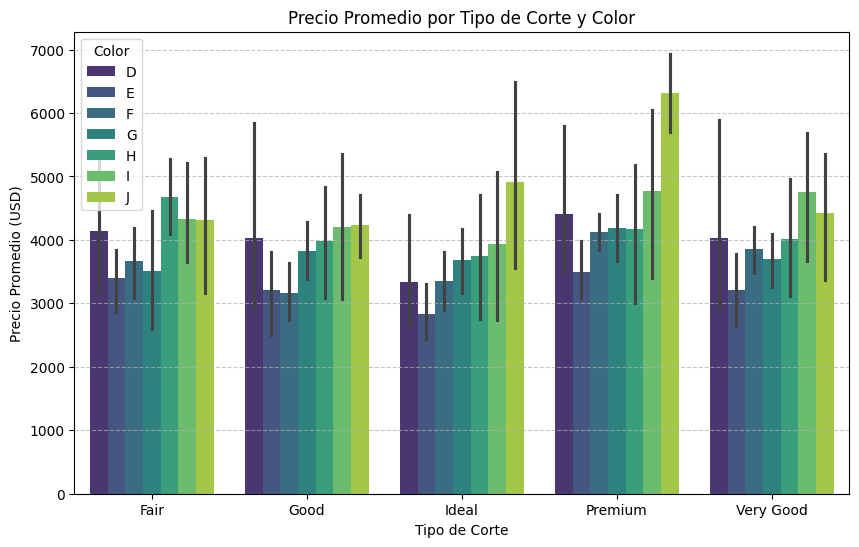

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='cut', y='price_mean', hue='color', palette='viridis')
plt.title("Precio Promedio por Tipo de Corte y Color")
plt.xlabel("Tipo de Corte")
plt.ylabel("Precio Promedio (USD)")
plt.legend(title='Color')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## PARTE 3: 20 % distribuciones: 


### 3.1. Outliers: Visualizaci√≥n Q1 y Q3 y calcular l√≠mites tukey y filtrar. Sobre la columna precio.


C√°lculo de Q1, Q3 e IQR:

Q1 (25%): El valor debajo del cual se encuentra el 25% de los datos.
Q3 (75%): El valor debajo del cual se encuentra el 75% de los datos.
IQR: La diferencia entre Q3 y Q1, mide la dispersi√≥n central de los datos.
L√≠mites de Tukey:

L√≠mite inferior: 
ùëÑ
1
‚àí
1.5
√ó
ùêº
ùëÑ
ùëÖ
Q1‚àí1.5√óIQR
L√≠mite superior: 
ùëÑ
3
+
1.5
√ó
ùêº
ùëÑ
ùëÖ
Q3+1.5√óIQR
Filtrar Outliers:

Separamos los valores que est√°n fuera de los l√≠mites y los etiquetamos como outliers.

In [38]:
df.head()

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


carat      cut color clarity  depth  table  price     x     y     z  \
0  0.229980    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43   
1  0.209961  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31   
2  0.229980     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31   
3  0.290039  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63   
4  0.310059     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75   

  cut_int  
0       3  
1       4  
2       2  
3       4  
4       2

In [36]:
# Cuartiles e IQR
def cuartiles_iqr(dataframe, columna):
    # C√°lculo de Q1, Q3 e IQR
    Q1 = np.percentile(dataframe[columna], 25)  # Primer cuartil
    Q2 = np.percentile(dataframe[columna], 50)  # Segundo cuartil == mediana
    Q3 = np.percentile(dataframe[columna], 75)  # Tercer cuartil
    IQR = Q3 - Q1 # Rango intercuart√≠lico
    print("Cuartiles e IQR:")
    print(f"Q1: {Q1}, Q2 (mediana): {Q2}, Q3: {Q3}")
    print(f"IQR: {IQR}")
    return Q1, Q3, IQR

Q1, Q3, IQR = cuartiles_iqr(df, 'price')
print("------------------------------------------------")


Cuartiles e IQR:
Q1: 950.0, Q2 (mediana): 2401.0, Q3: 5324.0
IQR: 4374.0
------------------------------------------------


In [37]:
# Filtrar por porcentaje
def filtrar_por_porcentaje(dataframe, columna):
    sorted_values = np.sort(dataframe[columna])   # Ordenar los valores de la columna
    # Calcular los percentiles
    bottom_20_percent = np.percentile(sorted_values, 20)
    top_20_percent = np.percentile(sorted_values, 80)
    
    # Filtrar precios seg√∫n los percentiles
    bottom_prices = dataframe[dataframe[columna]<= bottom_20_percent]
    top_prices = dataframe[dataframe[columna] >= top_20_percent]

    # Imprimir resultados
    print(f"Filtrar columna {columna} por porcentaje:")
    print(f"Percentil 20: {bottom_20_percent:.2f}")
    print(f"Percentil 80: {top_20_percent:.2f}")
    print(f"Cantidad en el 20% m√°s barato: {len(bottom_prices)}")
    print(f"Cantidad en el 20% m√°s caro: {len(top_prices)}")
   
    return top_prices, bottom_prices, top_20_percent, bottom_20_percent

# Llamar a la funci√≥n con el DataFrame y la columna 'price'
top_prices, bottom_prices, top_20_percent, bottom_20_percent = filtrar_por_porcentaje(df, 'price')
print("------------------------------------------------")


Filtrar columna price por porcentaje:
Percentil 20: 837.00
Percentil 80: 6301.00
Cantidad en el 20% m√°s barato: 10796
Cantidad en el 20% m√°s caro: 10790
------------------------------------------------


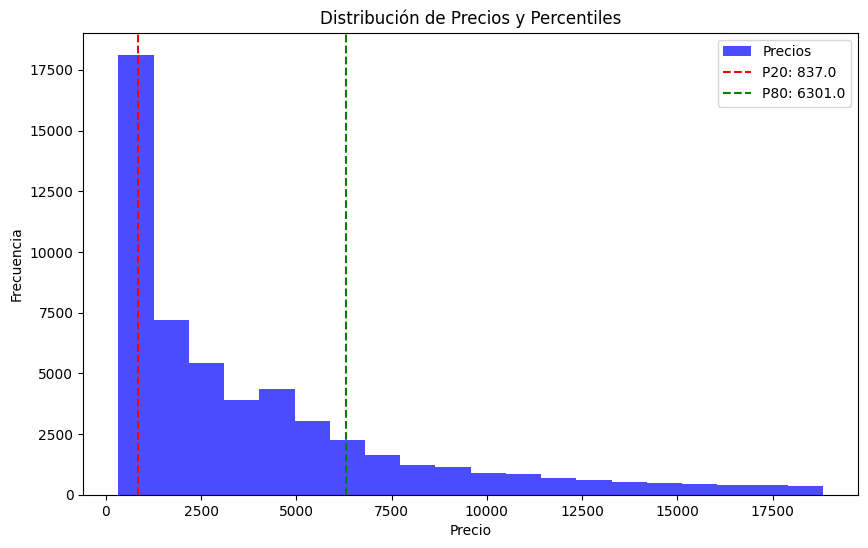

In [38]:
# histograma para visualizar los datos y marcar los percentiles:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='blue', alpha=0.7, label='Precios')
plt.axvline(bottom_20_percent, color='red', linestyle='--', label=f'P20: {bottom_20_percent}')
plt.axvline(top_20_percent, color='green', linestyle='--', label=f'P80: {top_20_percent}')
plt.title("Distribuci√≥n de Precios y Percentiles")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

In [80]:
'''Crear una nueva columna para identificar si cada fila est√° en el 20% m√°s barato o m√°s caro:
df['percentile_category'] = df['price'].apply(
    lambda x: 'Bottom 20%' if x <= bottom_20_percent else 'Top 20%' if x >= top_20_percent else 'Middle'
)'''

"Crear una nueva columna para identificar si cada fila est√° en el 20% m√°s barato o m√°s caro:\ndf['percentile_category'] = df['price'].apply(\n    lambda x: 'Bottom 20%' if x <= bottom_20_percent else 'Top 20%' if x >= top_20_percent else 'Middle'\n)"

In [81]:
'''#Si necesitas calcular los cuartiles para grupos dentro del DataFrame:
grouped = df.groupby('otra_columna')['price'].apply(lambda x: np.percentile(x, [25, 50, 75]))
print(grouped)'''

"#Si necesitas calcular los cuartiles para grupos dentro del DataFrame:\ngrouped = df.groupby('otra_columna')['price'].apply(lambda x: np.percentile(x, [25, 50, 75]))\nprint(grouped)"

In [39]:
# Varianza y desviaci√≥n est√°ndar
def varianza_desviacion(columna):
    variance = np.var(columna)
    std_dev = np.std(columna)
    print(f"Varianza: {variance:.2f}, Desviaci√≥n est√°ndar: {std_dev:.2f}")
    return variance, std_dev

# Llamar a la funci√≥n con la columna 'price'
variance, std_dev = varianza_desviacion(df['price'])
print("------------------------------------------------")

Varianza: 15911842.00, Desviaci√≥n est√°ndar: 3988.97
------------------------------------------------


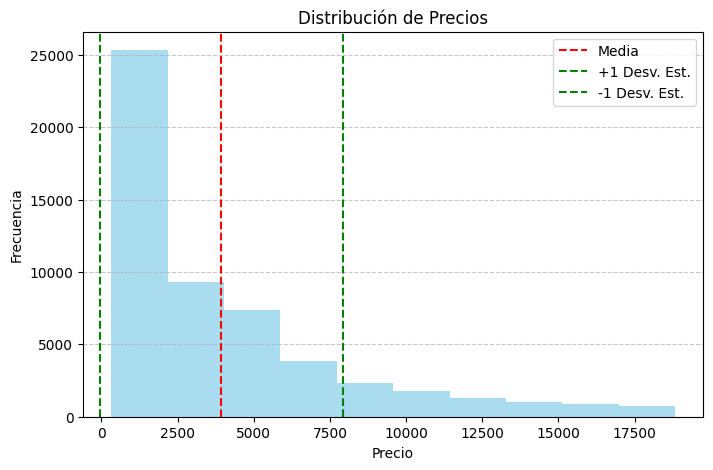

In [40]:
# histograma o boxplot para visualizar la dispersi√≥n de los datos:
plt.figure(figsize=(8, 5))
plt.hist(df['price'], bins=10, color='skyblue', alpha=0.7)
plt.axvline(df['price'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df['price'].mean() + std_dev, color='green', linestyle='--', label='+1 Desv. Est.')
plt.axvline(df['price'].mean() - std_dev, color='green', linestyle='--', label='-1 Desv. Est.')
plt.title('Distribuci√≥n de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [41]:
# Detectar outliers con Tukey
def filtro_outliers_tukey(dataframe, columna, q1, q3, iqr):
    # C√°lculo de l√≠mites de Tukey
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    # Filtrar los outliers
    outliers = dataframe[(dataframe[columna] < lower_limit) | (dataframe[columna] > upper_limit)]
    filtered_df = dataframe[(dataframe[columna] >= lower_limit) & (dataframe[columna] <= upper_limit)]
    print(f"Outliers detectados con Tukey: {len(outliers)}")
    print(f"L√≠mite Inferior: {lower_limit}, L√≠mite Superior: {upper_limit}")
    print("\nOutliers detectados:")
    print(outliers)
    # Agregar Columnas para Identificar Outliers:
    dataframe['is_outlier'] = (dataframe[columna] < lower_limit) | (dataframe[columna] > upper_limit)
    
    return upper_limit, lower_limit, outliers, filtered_df

# Llamar a la funci√≥n con el DataFrame y la columna 'price'
upper_limit, lower_limit, outliers, filtered_df = filtro_outliers_tukey(df, 'price', Q1, Q3, IQR)
print("------------------------------------------------")

Outliers detectados con Tukey: 3539
L√≠mite Inferior: -5611.0, L√≠mite Superior: 11885.0

Outliers detectados:
          carat        cut color clarity  depth  table    price     x     y  \
23820  1.169922      Ideal     F    VVS1   62.1   57.0  11886.0  6.82  6.73   
23821  2.080078      Ideal     I     SI2   62.0   56.0  11886.0  8.21  8.10   
23822  1.700195    Premium     I     VS2   62.2   58.0  11888.0  7.65  7.60   
23823  1.089844      Ideal     F      IF   61.6   55.0  11888.0  6.59  6.65   
23824  1.679688      Ideal     E     SI2   60.4   55.0  11888.0  7.79  7.70   
...         ...        ...   ...     ...    ...    ...      ...   ...   ...   
27745  2.000000  Very Good     H     SI1   62.8   57.0  18803.0  7.95  8.00   
27746  2.070312      Ideal     G     SI2   62.5   55.0  18804.0  8.20  8.13   
27747  1.509766      Ideal     G      IF   61.7   55.0  18806.0  7.37  7.41   
27748  2.000000  Very Good     G     SI1   63.5   56.0  18818.0  7.90  7.97   
27749  2.289062    P

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


In [48]:
'''# Aplicar Tukey a M√∫ltiples Columnas: Si deseas aplicar este an√°lisis a varias columnas num√©ricas:
for col in df.select_dtypes(include=np.number).columns:
    filtro_outliers_tukey(df, col)

#Filtrar el DataFrame: Si deseas eliminar los outliers y trabajar solo con los datos filtrados:
filtered_df.to_csv('filtered_data.csv', index=False)'''

"# Aplicar Tukey a M√∫ltiples Columnas: Si deseas aplicar este an√°lisis a varias columnas num√©ricas:\nfor col in df.select_dtypes(include=np.number).columns:\n    filtro_outliers_tukey(df, col)\n\n#Filtrar el DataFrame: Si deseas eliminar los outliers y trabajar solo con los datos filtrados:\nfiltered_df.to_csv('filtered_data.csv', index=False)"

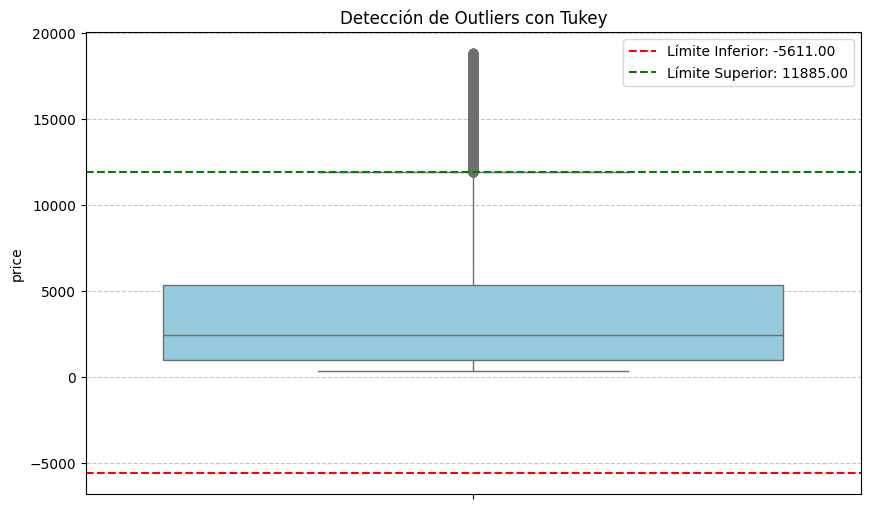

In [42]:
# boxplot para visualizar los datos y marcar los l√≠mites:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='price', color='skyblue')
plt.axhline(lower_limit, color='red', linestyle='--', label=f'L√≠mite Inferior: {lower_limit:.2f}')
plt.axhline(upper_limit, color='green', linestyle='--', label=f'L√≠mite Superior: {upper_limit:.2f}')
plt.title("Detecci√≥n de Outliers con Tukey")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

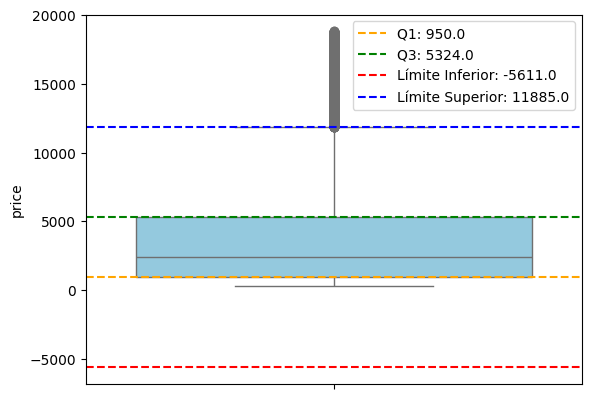

In [43]:
# boxplot con los l√≠mites de Tukey:
sns.boxplot(data=df, y='price', color='skyblue')
plt.axhline(Q1, color='orange', linestyle='--', label=f'Q1: {Q1}')
plt.axhline(Q3, color='green', linestyle='--', label=f'Q3: {Q3}')
plt.axhline(lower_limit, color='red', linestyle='--', label=f'L√≠mite Inferior: {lower_limit}')
plt.axhline(upper_limit, color='blue', linestyle='--', label=f'L√≠mite Superior: {upper_limit}')
plt.legend()
plt.show()

Graficar Outliers


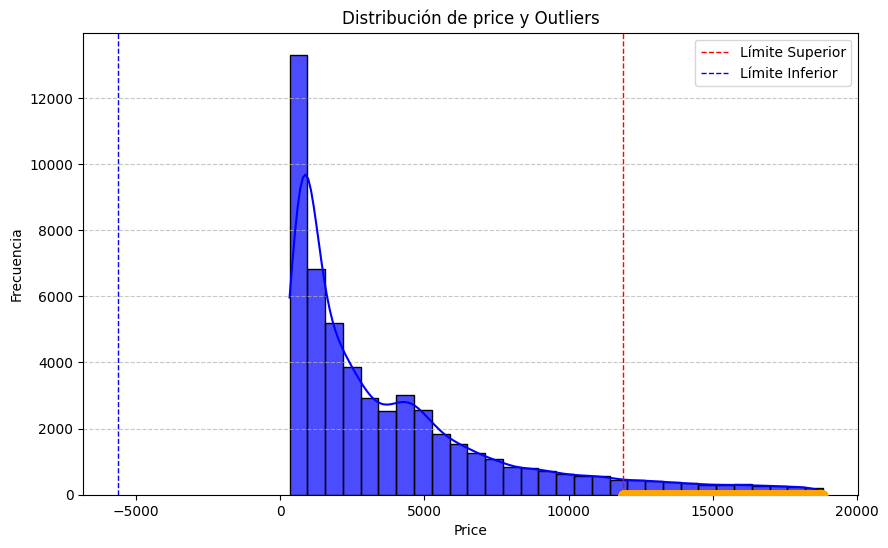

------------------------------------------------


In [44]:

# Graficar outliers
def graficar_outliers(dataframe, columna, upper_limit, lower_limit, outliers):
    print("Graficar Outliers")
    plt.figure(figsize=(10, 6))
    # Histograma con KDE
    sns.histplot(dataframe[columna], bins=30, color="blue", alpha=0.7, kde=True)
    # L√≠mites
    # Se agregan l√≠neas verticales para marcar los l√≠mites superior e inferior:
    plt.axvline(upper_limit, color='red', linestyle='dashed', linewidth=1, label="L√≠mite Superior")
    plt.axvline(lower_limit, color='blue', linestyle='dashed', linewidth=1, label="L√≠mite Inferior")
    # Configuraci√≥n del gr√°fico
    plt.legend()
    plt.title(f"Distribuci√≥n de {columna} y Outliers")
    plt.xlabel(columna.capitalize())
    plt.ylabel("Frecuencia")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # Resaltar los outliers en el gr√°fico:
    plt.scatter(outliers[columna],[0]*len(outliers), color='orange', label='Outliers', zorder=5)
    # plt.grid()
    plt.show()
    
graficar_outliers(df, 'price', upper_limit, lower_limit, outliers)
print("------------------------------------------------")

In [55]:
# Estandarizar una columna
def estandarizar(dataframe, columna):
    print(f"Estandarizaci√≥n de la columna '{columna}':")
    # C√°lculo de la media y desviaci√≥n est√°ndar
    mean_columna = np.mean(dataframe[columna])
    std_dev_columna = np.std(dataframe[columna])
    print(f"Media: {mean_columna:.2f}, Desviaci√≥n est√°ndar: {std_dev_columna:.2f}")
    # Estandarizaci√≥n
    columna_std = (dataframe[columna] - mean_columna) / std_dev_columna
    return columna_std

df['price_std'] = estandarizar(df, 'price')
print("------------------------------------------------")
# Mostrar el DataFrame resultante
print("DataFrame con columna estandarizada:")
print(df)


Estandarizaci√≥n de la columna 'price':
Media: 3932.46, Desviaci√≥n est√°ndar: 3988.97
------------------------------------------------
DataFrame con columna estandarizada:
          carat        cut color clarity  depth  table   price     x     y  \
0      0.229980      Ideal     E     SI2   61.5   55.0   326.0  3.95  3.98   
1      0.209961    Premium     E     SI1   59.8   61.0   326.0  3.89  3.84   
2      0.229980       Good     E     VS1   56.9   65.0   327.0  4.05  4.07   
3      0.290039    Premium     I     VS2   62.4   58.0   334.0  4.20  4.23   
4      0.310059       Good     J     SI2   63.3   58.0   335.0  4.34  4.35   
...         ...        ...   ...     ...    ...    ...     ...   ...   ...   
53935  0.720215      Ideal     D     SI1   60.8   57.0  2757.0  5.75  5.76   
53936  0.720215       Good     D     SI1   63.1   55.0  2757.0  5.69  5.75   
53937  0.700195  Very Good     D     SI1   62.8   60.0  2757.0  5.66  5.68   
53938  0.859863    Premium     H     SI2   61.0

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


-8.825996e-08 1.0000093
Media de 'price_std': -8.825995934103048e-08
Desviaci√≥n est√°ndar de 'price_std': 1.000009298324585
        price  price_std
0       326.0  -0.904109
1       326.0  -0.904109
2       327.0  -0.903858
3       334.0  -0.902104
4       335.0  -0.901853
...       ...        ...
53935  2757.0  -0.294678
53936  2757.0  -0.294678
53937  2757.0  -0.294678
53938  2757.0  -0.294678
53939  2757.0  -0.294678

[53940 rows x 2 columns]


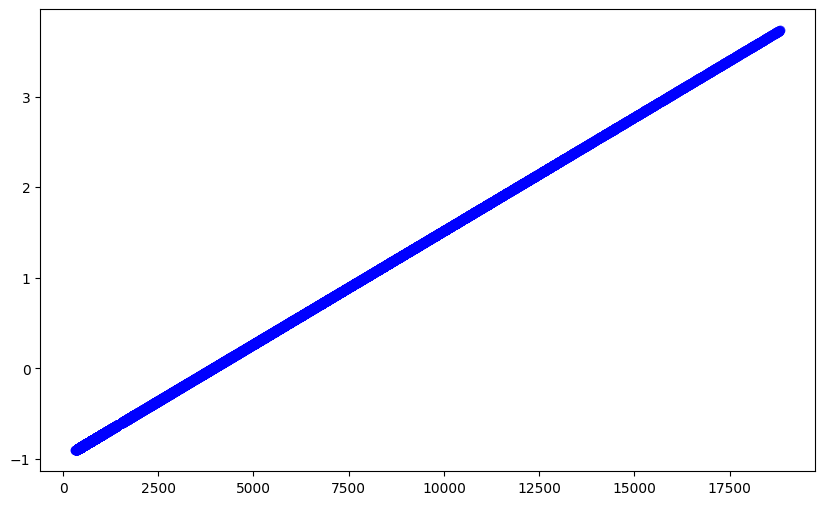

In [75]:
# Verificaci√≥n: Verifica si la media de la columna estandarizada es cercana a 0 y la desviaci√≥n est√°ndar cercana a 1:
print(df['price_std'].mean(), df['price_std'].std())

# Verificar si la transformaci√≥n es correcta
print(f"Media de 'price_std': {df['price_std'].mean()}")
print(f"Desviaci√≥n est√°ndar de 'price_std': {df['price_std'].std()}")

# Para confirmar que los datos estandarizados son correctos, puedes inspeccionar la columna price_std:
print(df[['price', 'price_std']])
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['price_std'], color='blue', alpha=0.5)

In [ ]:
'''Aplicar a M√∫ltiples Columnas: Si deseas estandarizar todas las columnas num√©ricas:

python
Copiar c√≥digo
for col in df.select_dtypes(include=np.number).columns:
    df[f'{col}_std'] = estandarizar(df, col)'''

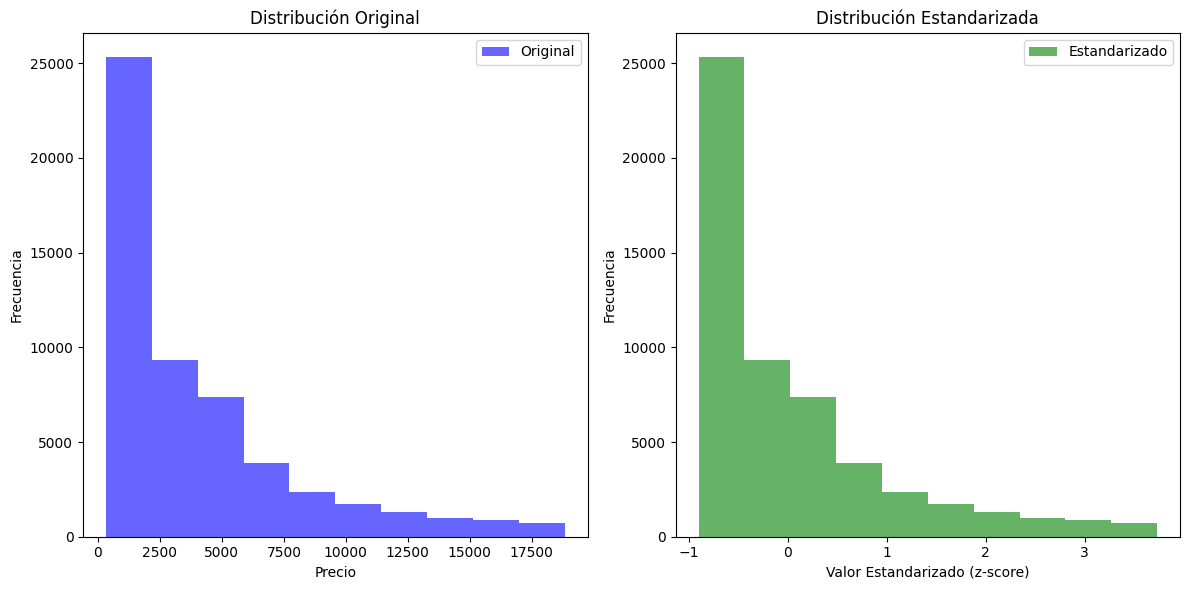

In [76]:
# Visualizaci√≥n
plt.figure(figsize=(12, 6))

# Histograma original
plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=10, alpha=0.6, color='blue', label='Original')
plt.title('Distribuci√≥n Original')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma estandarizado
plt.subplot(1, 2, 2)
plt.hist(df['price_std'], bins=10, alpha=0.6, color='green', label='Estandarizado')
plt.title('Distribuci√≥n Estandarizada')
plt.xlabel('Valor Estandarizado (z-score)')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   carat       53940 non-null  float16 
 1   cut         53940 non-null  category
 2   color       53940 non-null  category
 3   clarity     53940 non-null  category
 4   depth       53940 non-null  float64 
 5   table       53940 non-null  float64 
 6   price       53940 non-null  float32 
 7   x           53940 non-null  float64 
 8   y           53940 non-null  float64 
 9   z           53940 non-null  float64 
 10  cut_int     53940 non-null  category
 11  is_outlier  53940 non-null  bool    
 12  price_std   53940 non-null  float32 
dtypes: bool(1), category(4), float16(1), float32(2), float64(5)
memory usage: 2.8 MB


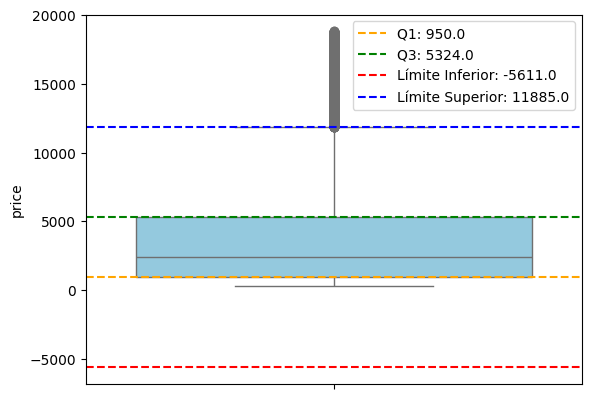

In [78]:
# Agregar Gr√°ficos: Incluye un boxplot con los l√≠mites de Tukey:
sns.boxplot(data=df, y='price', color='skyblue')
plt.axhline(Q1, color='orange', linestyle='--', label=f'Q1: {Q1}')
plt.axhline(Q3, color='green', linestyle='--', label=f'Q3: {Q3}')
plt.axhline(lower_limit, color='red', linestyle='--', label=f'L√≠mite Inferior: {lower_limit}')
plt.axhline(upper_limit, color='blue', linestyle='--', label=f'L√≠mite Superior: {upper_limit}')
plt.legend()
plt.show()

### 3.2. asimetr√≠a, curtosis y transformar datos con logaritmo o ra√≠z cuadrada, aplicar sobre precio, visualizar el histograma y/o boxplot por tipo de corte. Opcional ajustar la escala.


In [79]:

# Asimetr√≠a y curtosis
def asimetria_curtosis(dataframe, columna):
    print("Asimetr√≠a y curtosis")
    skewness = stats.skew(df[columna])
    kurtosis = stats.kurtosis(df[columna])
    print(f"Asimetr√≠a: {skewness}, Curtosis: {kurtosis}")
    
asimetria_curtosis(df, 'price')
print("------------------------------------------------")

Asimetr√≠a y curtosis
Asimetr√≠a: 1.6183805465698242, Curtosis: 2.1776084899902344
------------------------------------------------


In [80]:
# Transformar distribuciones
def transformar_distribuciones(dataframe, columna):
    print("Transformar distribuciones")
    price_log = np.log(df[columna][columna > 0])
    plt.figure(figsize=(10, 6))
    sns.histplot(price_log, kde=True, bins=30, color="green", alpha=0.6)
    plt.title("Transformaci√≥n Logar√≠tmica de Precios")
    plt.xlabel("Log(Precio)")
    plt.ylabel("Frecuencia")
    plt.grid()
    plt.show()
    
transformar_distribuciones(df, 'price')
print("------------------------------------------------")


Transformar distribuciones


TypeError: '>' not supported between instances of 'str' and 'int'

In [58]:
print("plotbox")
plt.boxplot(price, showmeans=True)

plotbox


NameError: name 'price' is not defined

### 3.3. Discretizar la columna precio por barato, medio, caro usando la funci√≥n pd.cut


## PARTE 4: 30 % visualizaciones:


### 4.1. Seaborn EDAS:


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

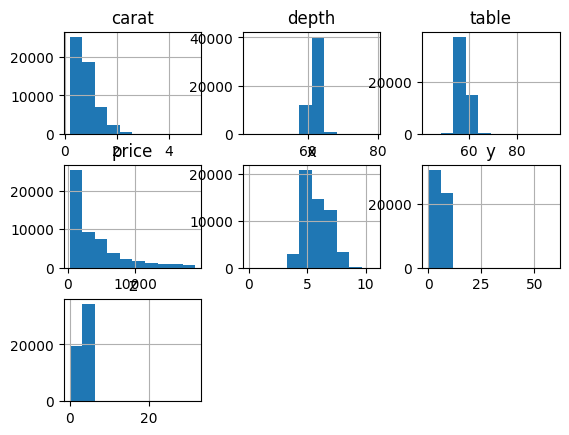

In [51]:
df.hist()

#### 4.1.1. univariantes:


#####  4.1.1.1. histogramas y curvas de densidad


##### 4.1.1.2. boxplot

#####  4.1.1.3. countplot


#### 4.1.2. bivariantes y multivariantes


##### 4.1.2.1. scatterplot con hue, con size, con style


##### 4.1.2.2. Calcular correlaci√≥n con Pandas y mostrarla con seaborn


##### 4.1.2.3. Hacer la correlaci√≥n en un gr√°fico de barras para la columna 'price'


##### 4.1.2.4. Crear una pivot table usando como index y columns algunas variables categ√≥ricas y como values usar el price y visualizarla con heatmap de seaborn


#### 4.1.3. Combinarlas con:


##### 4.1.3.1. hue, style, size, row, col usando un relplot


##### 4.1.3.2. filtro
